# Discussion on overall approach

As a first point, let's discuss the modelling approach. There were a couple of decision that had to be made. The two most important to mention were as follows:
   * Will we use traditional or machine learning based approaches to the analysis
   * Will we develop predictions on a monthly or a yearly basis?
   * Will we develop predictions wrt South Africa as a whole, for each province, or for each city in each province?
   
Let me share my reasoning for each question. 

First, as we are going to want to know how many signups are predicted wrt certain location features, we are unable to use classical time series modelling approaches. For such models, you can only have a target and time as the input.

Second, the decision between a monthly and yearly prediction model came down to data scarcity. If we were to model on a yearly basis, we would have a total of 5 datapoint (one for each year from 2018-2023). Having only 5 data point can result in difficulties. As such, I opted for a monthly forecast. In hindsight, if time was available, I would have wanted to experiment with a yearly model also using a highly regularised model.

Third, given the usecase, it makes sense that we want to know where people will be signing up so that we may act accordingly (get clients in those locations). From that point of view, it would be most valuable to make predictions specific to a city. Yet, I decided to model on a provincial level. To understand why I could not adopt a city level approach, please see the section titled City level model below.

#### City level model:
Given the usecase, it would be ideal if we are able to make city level predictions. That way, if we predict that a particular city will continue to have a considerable number of signups, we would be informed to focus our efforts on gaining clients in that city. It is unfortunate that the data on a city level leaves much wanting. Let me take you through my considerations in reaching the conclusion to not create a city level model.

For any decision that needs to "hold up in court", we should only rely on the predictions made by the provinsial level model. However, for the purposes of having some indication as to what my happen on a city level, I considered two approaches. The first approach I considered would be based on the assumption that the datapoints for which we do not have a city, are distributed per period equavalently across all cities (according to each cities occurence during that period). This assumption would imply that the occurence of no city being filled out is random across all cities, that there is no detectable pattern in the kind of places for which we are unable to identify a city. When I further investigated the data I found that not to be the case. On exploring the data, it became clear that the cases for which we are unable to detect a city, come down to two causes: 
   1. Carelessness on the part of the user that entered the information (e.g. just not adding a city). In which case the assumption above would hold. And
   2. The city in question not being recognised on digital maps such that our db of city names does not include it. In which case the assumption above does not hold.
   
In the case where users have simply not filled out a city we are completely in the dark as to how we may handle these missing data points. Any prediction may fall far short of accurate in their absense. And yet we cannot include them for we do not have any insight into their kind.  

As a result, I've decided to not do predictions on a city level, but only on a province level. There are approximately 350000 entries in the db for which we have not registered a city. These missing entries are spread across the relevant time span. We cannot hope to make meaningful predictions with this amount of data missing on a city level. Garbage in, garbage out. 

Recommendation:
My recommendation is that we fix the underlying cause of the problem. If we do we will soon be able to make informative predictions on a city level. We can fix this problem by making sure the frontend is adapted as follows:
   1. Instead of having the address input be a raw text input, users should be forced to select from among available options (e.g. dropdownlist). This way we controle the quality of what is received in the backend.
   2. Secondly, the address input must be set to required such that users cannot leave it out.


# Discussion of two modelling approaches addopted

I made use of two modelling approaches, namely a rolling forcast model and what we will call a "normal forecast model". The difference between these two approaches is that where a rolling forcast model builds upon its predictions from one month to the next, a normal forcast model does not. In our rolling forcast model we have a feature that captures the number of signups in a particular province in the previous month. In this way, the model is aided in drawing insight from the previous months signups in a province when predicting the next months signups for that province. So when we make predictions for the second month from our starting date (2023-06-01), we will infact use the predictions made for the first month as a feature.

Rolling forecast model often perform better than "normal forecast models". However, they do have the dynamic where prediction errors are compounded. If the prediction for the previous month was off, by using that prediction as a feature in the next months predictions, those predictions will likely be even further off. 

Respectively, the results from the rolling forecast model and the "normal prediction model was as follows:

# Discussion of results:

### Rolling forecast model
This model predicted the following additional signups for each province between 2023-06-01 and 2025-01-01:

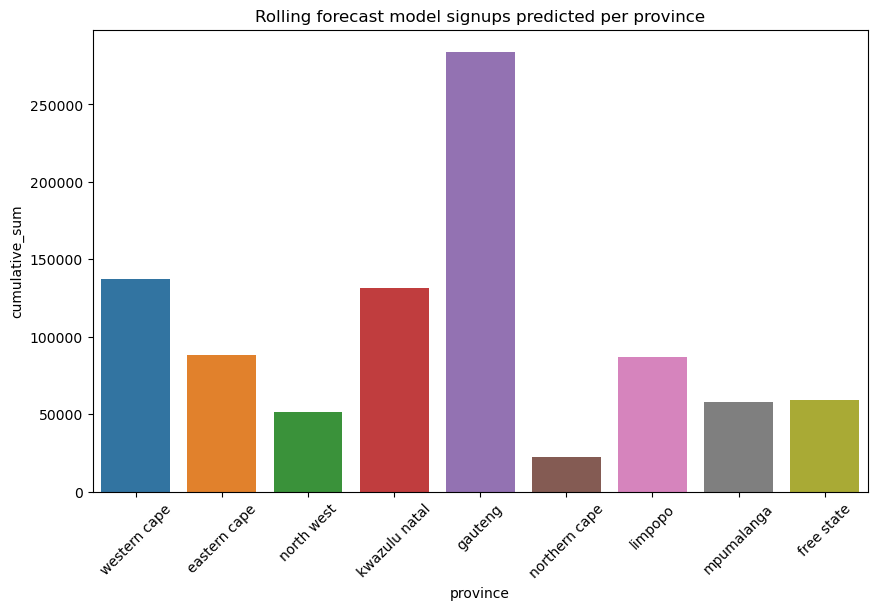

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'cumulative_sum': [136966.453125, 87948.070312, 51109.562500, 131404.515625, 
                       284004.781250, 22311.949219, 86586.234375, 57485.414062, 59020.574219],
    'province': ['western cape', 'eastern cape', 'north west', 'kwazulu natal', 'gauteng', 
                 'northern cape', 'limpopo', 'mpumalanga', 'free state']
}

df1 = pd.DataFrame(data, index=pd.to_datetime(['2025-01-01']*9))

plt.figure(figsize=(10,6))
ax = sns.barplot(x='province', y='cumulative_sum', data=df1)
ax.set_title('Rolling forecast model signups predicted per province')
plt.xticks(rotation=45) 
plt.show()

According to this model there will be an additional 916 837 signups by 1 Jan 2025. Which means there will be a total of 2 416 837 signups. You can see the cumulative distribution plot across all provinces below.

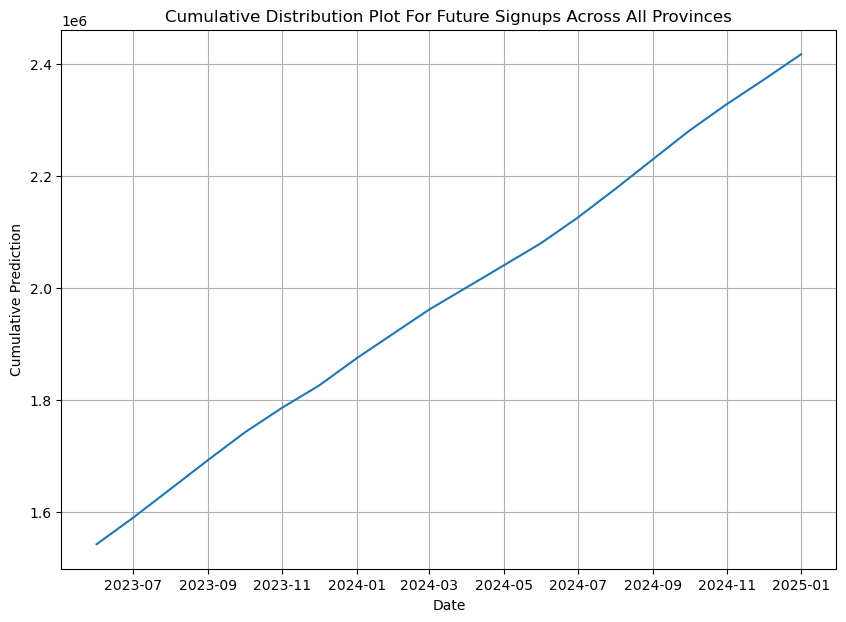

In [28]:
data = {
    'cumulative_sum': [42500.894531,89731.203125,141355.000000,193189.843750,242060.828125,286407.656250,325491.781250,
                        374190.218750,419403.062500,461536.843750,501250.593750,539836.750000,579929.250000,625196.437500,
                        676416.937500,729412.500000,780565.437500,828104.875000,871095.187500,916837.500000]
}
data['cumulative_sum'] = [x+1500000 for x in data['cumulative_sum']]
index = pd.date_range("2023-06-01", periods=20, freq='MS')
df3 = pd.DataFrame(data, index=index)
plt.figure(figsize=(10, 7))
plt.plot(df3.index, df3['cumulative_sum'])
plt.xlabel('Date')
plt.ylabel('Cumulative Prediction')
plt.title('Cumulative Distribution Plot For Future Signups Across All Provinces')
plt.grid(True)
plt.show()


### Nornal forcast model

This model predicted the following additional signups for each province between 2023-06-01 and 2025-01-01:

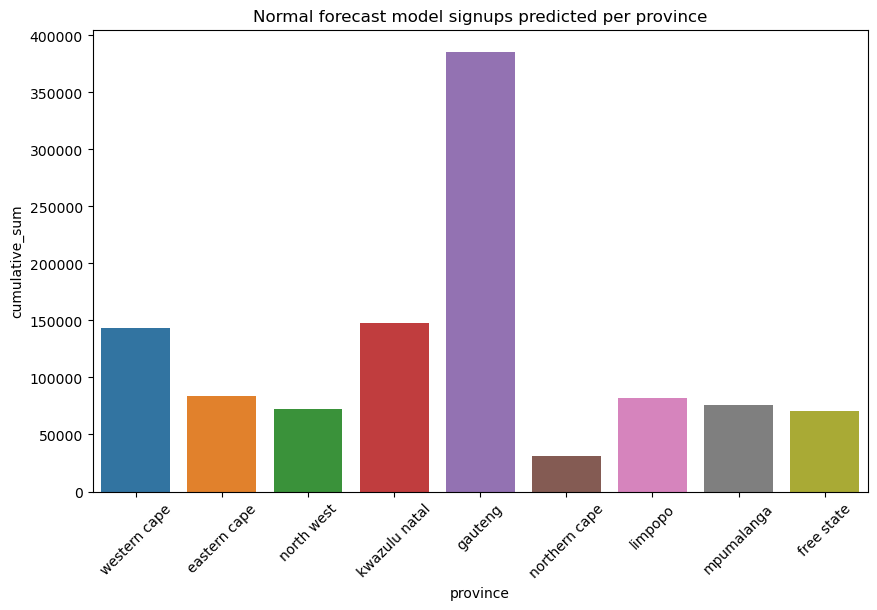

In [21]:
import pandas as pd

data = {
    'cumulative_sum': [143417.0, 84054.0, 72094.0, 147345.0, 385738.0, 30824.0, 82243.0, 75648.0, 70836.0],
    'province': ['western cape', 'eastern cape', 'north west', 'kwazulu natal', 'gauteng', 'northern cape', 'limpopo', 'mpumalanga', 'free state']
}

df2 = pd.DataFrame(data, index=pd.to_datetime(["2025-01-01"] * 9))
plt.figure(figsize=(10,6))
ax = sns.barplot(x='province', y='cumulative_sum', data=df2)
ax.set_title('Normal forecast model signups predicted per province')
plt.xticks(rotation=45) 
plt.show()

For you benefit I plot both the prediction wrt provinces for the rolling and normal forecast model on the same graph below

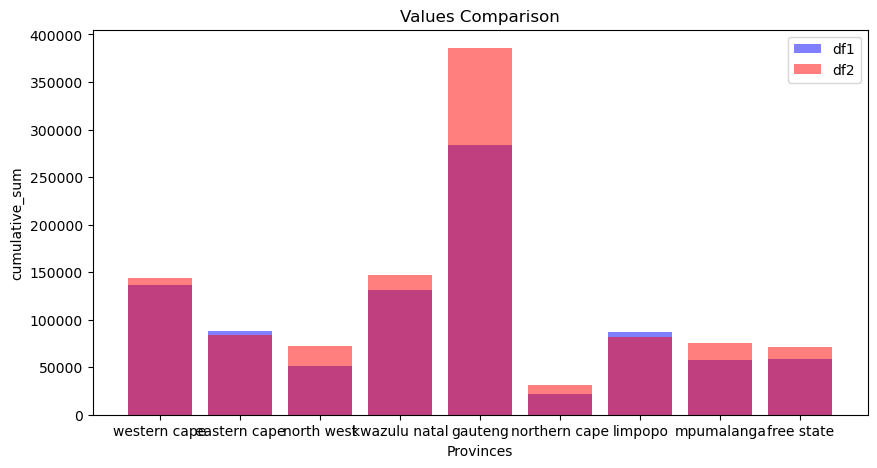

In [26]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot df1 values
plt.bar(df1['province'], df1['cumulative_sum'], color='b', alpha=0.5, label='df1')

# Plot df2 values
plt.bar(df2['province'], df2['cumulative_sum'], color='r', alpha=0.5, label='df2')

# Add a title
plt.title('Values Comparison')

# Add labels for the x and y axes
plt.xlabel('Provinces')
plt.ylabel('cumulative_sum')

# Add a legend
plt.legend()

# Show the plot
plt.show()

According to this model there will be an additional 1 060 896 signups by 1 Jan 2025. Which means there will be a total of 2 560 896 signups.

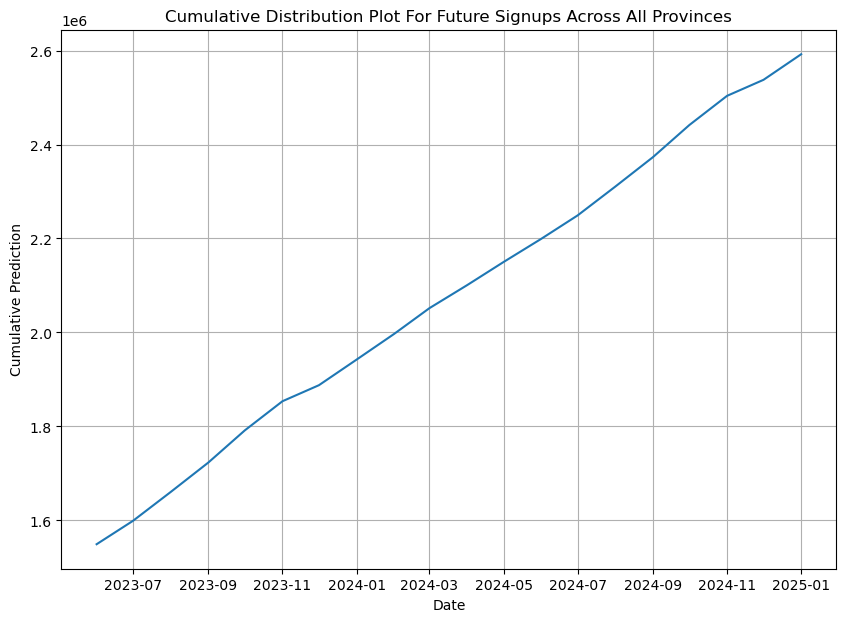

In [29]:
import pandas as pd

data = {
    'cumulative_sum': [49317.0, 99233.0, 160553.0, 223249.0, 291647.0, 353681.0, 387757.0, 442233.0, 497083.0, 551793.0, 600733.0, 649966.0, 699283.0, 749199.0, 810519.0, 873215.0, 941613.0, 1003647.0, 1037723.0, 1092199.0]
}

data['cumulative_sum'] = [x+1500000 for x in data['cumulative_sum']]
index = pd.date_range("2023-06-01", periods=20, freq='MS')
df4 = pd.DataFrame(data, index=index)
plt.figure(figsize=(10, 7))
plt.plot(df4.index, df4['cumulative_sum'])
plt.xlabel('Date')
plt.ylabel('Cumulative Prediction')
plt.title('Cumulative Distribution Plot For Future Signups Across All Provinces')
plt.grid(True)
plt.show()


For you benefit I plot both the prediction wrt overall signup count for the rolling and normal forecast model on the same graph below

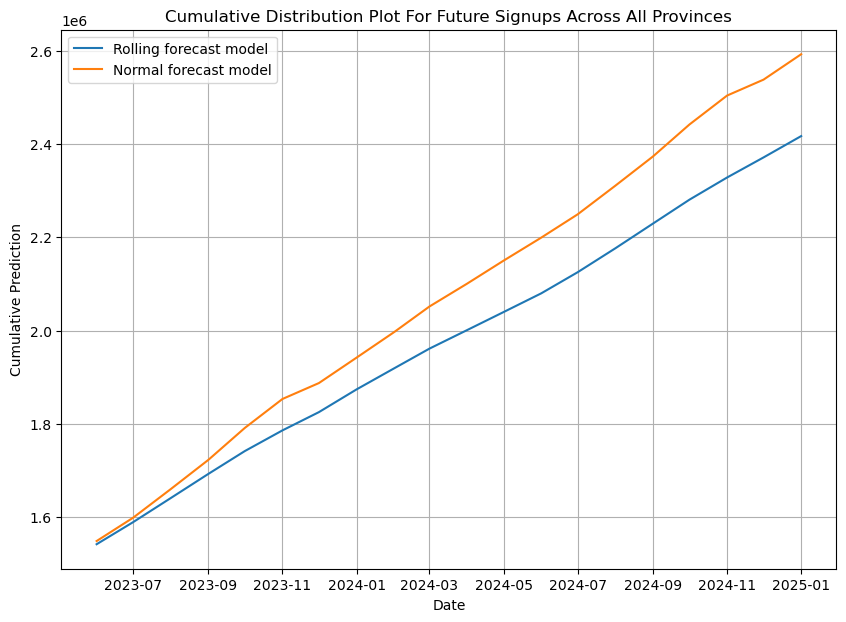

In [32]:
plt.figure(figsize=(10, 7))

# Original data plot
plt.plot(df3.index, df3['cumulative_sum'], label='Rolling forecast model')

# New data plot
plt.plot(df4.index, df4['cumulative_sum'], label='Normal forecast model')

plt.xlabel('Date')
plt.ylabel('Cumulative Prediction')
plt.title('Cumulative Distribution Plot For Future Signups Across All Provinces')
plt.legend()  # Added a legend
plt.grid(True)
plt.show()

### There is a significant about of additional information in the rest of the notebooks, please feel free to have a look.